<img src="img/logo.png" height="400" width="200">

# Guía práctica de estudio 11: <br>*Estrategias para la construcción de algoritmos*

### Elaborado por:

* M.C. Edgar E. García Cano
* Ing. Jorge A. Solano Gálvez

### Autorizado por:
* M.C. Alejandro Velázquez Mena

## Objetivo:

>El objetivo de esta guía es implementar, al menos, dos enfoques de diseño (estrategias) de algoritmos y analizar las implicaciones de cada uno de ellos.

## Actividades:

- Revisar el concepto y un ejemplo de diversas estrategias para construir algoritmos (fuerza bruta, algoritmo ávido, bottom-up, top-down, divide y vencerás, etc).

## Conceptos a revisar en Python:

- Escribir y leer en archivos.
- Graficar funciones usando la biblioteca Matplotlib.
- Generar listas de números aleatorios.
- Medir y graficar tiempos de ejecución.

#### Repositorio de la guía:

>Jupyter Notebook GitHub: [[ipynb](https://github.com/eegkno/FI_UNAM/blob/master/02_Estructuras_de_datos_y_algoritmos_1/P11/EDyA11_I.ipynb)]<br>
>Jupyter Notebook Visualizador: [[nbviewer](http://nbviewer.jupyter.org/github/eegkno/FI_UNAM/blob/master/02_Estructuras_de_datos_y_algoritmos_1/P11/EDyA11_I.ipynb)]<br>

<i class="fa fa-exclamation-triangle fa-2x" aria-hidden="true"></i> **Es sumamente importante respetar las indentaciones al momento de escribir código en Python. Se recomienda usar 4 espacios por nivel de indentación, los espacios son preferidos sobre el uso de tabuladores (https://www.python.org/dev/peps/pep-0008/#code-lay-out)**.

----

## Fuerza bruta

El objetivo de resolver problemas por medio de fuerza es bruta es hacer una búsqueda exhaustiva de todas las posibilidades que lleven a la solución del problema. Un ejemplo de esto es encontrar una contraseña haciendo una combinación exhaustiva de caracteres alfanuméricos generando cadenas de cierta longitud. La desventaja de resolver problemas por medio de esta estrategia es el tiempo que toman.

A continuación se muestra una implementación de un buscador de contraseñas de entre 3 y 4 caracteres. Para este ejemplo se va a usar la biblioteca **string**, de ésta se van a importar los caracteres y dígitos.

También se usa la biblioteca **itertools** (https://docs.python.org/3/library/itertools.html#). La biblioteca **itertools** tiene una función llamada **product()** (https://docs.python.org/3/library/itertools.html#itertools.product) la cual se va a utilizar para realizar las combinaciones en cadenas de 3 y cuatro caracteres.

Las diferentes combinaciones generadas por el algoritmo se van a guardar en un archivo. Para guardar datos en un archivo se utiliza la función **open()**, que es para tener una referencia del archivo que se quiere abrir (https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files). Con la referencia creada se utiliza la función **write()**, que recibe la cadena que se va a escribir en el archivo. Finalmente, una vez que se termina la escritura hacia el archivo, éste se cierra con la función **close()**.

In [1]:
from string import ascii_letters , digits
from itertools import product

#Concatenar letas y dígitos en una sola cadena
caracteres = ascii_letters+digits

def buscador(con):
    
    #Archivo con todas las combinaciones generadas
    archivo = open("combinaciones.txt", "w")
    
    if 3<= len(con) <= 4:
        for i in range(3,5):
            for comb in product(caracteres, repeat = i):
                #Se utiliza join() para concatenar los caracteres regresado por la función product().
                #Como join necesita una cadena inicial para hacer la concatenación, se pone una cadena vacía
                #al principio
                prueba = "".join(comb)
                #Escribiendo al archivo cada combinación generada
                archivo.write( prueba + "\n"  )
                if  prueba == con:
                    print('Tu contraseña es {}'.format(prueba))
                    #Cerrando el archivo
                    archivo.close()
                    break
    else:
        print('Ingresa una contraseña que contenga de 3 a 4 caracteres')

In [2]:
from time import time
t0 = time() 
con = 'H0l4'
buscador(con)
print("Tiempos de ejecución {}".format(round(time()-t0, 6)))

Tu contraseña es H0l4
Tiempos de ejecución 3.217832


----

## Algoritmos ávidos (greedy)

Esta estrategia se diferencía de fuerza bruta porque va tomando una serie de deciciones en un orden específico, una vez que se ha ejecutado esa decisión, ya no se vuelve a considerar. En comparación con fuerza bruta, ésta puede ser más rápidá; aunque una desventaja es que la solución que se obtiene, no siempre es la más óptima.

**Tip:** En el siguiente ejemplo se va a realizar una división entre enteros, para esto se va a ocupar el operando **//**. La diferencia entre utilizar **/** y **//** es que el primer operador realiza una operación de números flotantes y el segundo una operación de números enteros.
```
5/2 = 2.5
5//2 = 2
```

A continuación se muestra la implementación del problema de cambio de monedas. El problema consiste en regresar el cambio de monedas, de cierta denominación,  usando el menor número de éstas. Este problema se resuelve escogiendo sucesivamente las monedas de mayor valor hasta que ya no se pueda seguir usándolas y cuando esto pasa, se utiliza la siguiente de mayor valor. La desventaje en esta solución es que si no se da la denominación de monedas en orden de mayor a menor, se resuelve el problema, pero no de una manera óptima.

In [3]:
def cambio(cantidad, denominaciones):
    resultado = []
    while (cantidad > 0):
        if (cantidad >= denominaciones[0]):
            
            num = cantidad // denominaciones[0]
            cantidad = cantidad - (num * denominaciones[0])
            resultado.append([denominaciones[0], num])
        denominaciones = denominaciones[1:]  #Se va consumiendo la lista de denominaciones
    return resultado

In [4]:
#Pruebas del algoritmo
print (cambio(1000, [500, 200, 100, 50, 20, 5, 1]))

print (cambio(500, [500, 200, 100, 50, 20, 5, 1]))

print (cambio(300, [50, 20, 5, 1]))

print (cambio(200, [5]))

print (cambio(98, [50, 20, 5, 1]))


[[500, 2]]
[[500, 1]]
[[50, 6]]
[[5, 40]]
[[50, 1], [20, 2], [5, 1], [1, 3]]


En el siguiente ejemplo no regresa la solución óptima, además, si no existiera la moneda de valor 1, la solución fallaría.

In [5]:
print (cambio(98, [5, 20, 1, 50]))

[[5, 19], [1, 3]]


----

## Bottom-up (programación dinámica)

El objetivo de esta estrategia es resolver un problema a partir de subproblemas que ya han sido resueltos. La solución final se forma a partir de la combinación de una o más soluciones que se guardan en una tabla, ésta previene que se vuelvan a calcular las soluciones.

Como ejemplo, se va a calcular el número *n* de la sucesión de Fibonacci.  La sucesión de Fibonacci es una sucesión infinita de números enteros cuyos primeros dos elementos son 0 y 1, los siguientes números son calculados por la suma de los dos anteriores.

```
0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...
```

A continuación se presenta la implementación iterativa para calcular la sucesión de Fibonacci.

In [6]:
def fibonacci_iterativo_v1(numero):
    f1=0
    f2=1
    tmp=0
    for i in range(1,numero-1):
        tmp = f1+f2
        f1=f2
        f2=tmp
    return f2

In [7]:
fibonacci_iterativo_v1(6)

5

**Tip:** En Python se puede hacer una *asignación paralela*, esto va a servir para evitar tener la variable auxiliar *tmp*, tal y como se muestra a continuación.

In [8]:
def fibonacci_iterativo_v2(numero):
    f1=0
    f2=1
    for i in range(1, numero-1):
        f1,f2=f2,f1+f2    #Asignación paralela
    return f2     

In [9]:
fibonacci_iterativo_v2(6)

5

Una vez que conocemos como calcular la sucesión de Fibonacci, ahora vamos a aplicar la estrategia **bottom-up**. Partimos del hecho de que ya tenemos las soluciones para: 
```
f(0) = 0
f(1) = 1
f(2) = 1
```

Estas soluciones previas son almacenadas en la tabla de soluciones *f_parciales*.
```
f_parciales = [0, 1, 1]
```

In [10]:
def fibonacci_bottom_up(numero):
    f_parciales = [0, 1, 1]  #Esta es la lista que mantiene las soluciones previamente calculadas
    while len(f_parciales) < numero:
        f_parciales.append(f_parciales[-1] + f_parciales[-2])
        print(f_parciales)
    return f_parciales[numero-1]

In [11]:
fibonacci_bottom_up(5)

[0, 1, 1, 2]
[0, 1, 1, 2, 3]


3

Como se observa en el resultado anterior, no se hace el cálculo de los primeros números, si no que se toman las soluciones ya existentes. La solución se encuentra calculando los resultaods desde los primeros números (casos base), hasta llegar a *n*, de abajo hacia arriba.

```
[0, 1, 1]         Datos iniciales
[0, 1, 1, 2]      Primera iteración, se calcula n-1 = 1, y n - 2 = 1;
[0, 1, 1, 2, 3]   Segunda iteración, se calcula n-1 = 2, y n - 2 = 1;

```

----

## Top-down

A diferencia de bottom-up, aquí se empiezan a hacer los cálculos de *n* hacia abajo. Además, se aplica una técnica llamada *memorización* la cual consiste en guardar los resultados previamente calculados, de tal manera que no se tengan que repetir operaciones.

Para aplicar la estrategia **top-down**, se utiliza un diccionario (*memoria*) el cual va a almacenar valores previamente calculados. Una vez que se realice el cálculo de algún elemento de la sucesión de Fibonacci, éste se va a almacenar ahí.

In [12]:
#Memoria inicial
memoria = {1:0, 2:1, 3:1}

In [13]:
def fibonacci_top_down(numero):
    if numero in memoria:      #Si el número ya se encuentra calculado, se regresa el valor ya ya no se hacen más cálculos
        return memoria[numero]
    f = fibonacci_iterativo_v2(numero-1) + fibonacci_iterativo_v2(numero-2)
    memoria[numero] = f
    return memoria[numero]

Como se muestra en el código anterior, para obtener *n*, se calculan *n-1* y *n-2* usando la versión iterativa. La deficiencia de este algoritmo es que hay cálculos que es están repitiendo. La ventaja, es que una vez que ya se calcularon, se guardan en
una memoria, que en este caso es un diccionario; en dado caso de que se necesite un valor que ya ha sido calculado, sólo regresa y ya no se realizan los cálculos.

In [14]:
fibonacci_top_down(12)

89

In [15]:
#Memoria después de obtener el elemento 12 de la sucesión de Fibonacci
memoria

{1: 0, 2: 1, 3: 1, 12: 89}

In [16]:
#Memoria después de obtener el elemento 8 de la sucesión de Fibonacci
fibonacci_top_down(8)

13

In [17]:
memoria

{1: 0, 2: 1, 3: 1, 8: 13, 12: 89}

Como se muestra en  la impresión de la variable *memoria*, que contiene los resultados previamente calculados, los nuevos valores obtenidos se agregaron a ésta. El problema con esta versión es que se siguen haciendo cálculos de más, ya que la función *fibonacci_iterativo_v2()* no tiene acceso a la variable memoria, lo que implica que tenemos que hacer modificaciones a la implementación. Por ejemplo, si se quiere calcular el elemento 5, se tiene que calcular (n-2) y (n-1), aunque algunos valores ya existen en la variable *memoria* no hay una manera de acceder a ellos.

```
f(5) = 
    (n-1) = f(4)+f(3)+f(2)+f(1)
    (n-2) = f(3)+f(2)+f(1)
```

Ahora, se requiere que los valores ya calculados sean guardados en un archivo, de tal manera que se puedan utilizar en otro instante de tiempo. Para esto se va a hacer uso de la biblioteca pickle (https://docs.python.org/3.5/library/pickle.html). Los archivos que se generan con pickle están en binario, por lo que no se puede leer a simple vista la información que contienen, como se haría desde un archivo de texto plano.

In [18]:
#Se carga la biblioteca
import pickle

#Guardar variable
#No hay restricción en lo que se pone como extensión del archivo, 
#generalmente se usa .p o .pickle como estandar.
archivo = open('memoria.p', 'wb')   #Se abre el archivo para escribir en modo binario
pickle.dump(memoria, archivo)       #Se guarda la variable memoria que es un diccionario
archivo.close()                     #Se cierra el archivo

In [19]:
#Leer variable
archivo = open('memoria.p', 'rb')          #Se abre el archivo para leer en modo binario
memoria_de_archivo = pickle.load(archivo)  #Se lee la variable
archivo.close()                            #Se cierra el archivo

Si no se realizó un cambio en *memoria*, ésta variable y *memoria_de_archivo* deben contener los mismos datos.

In [20]:
memoria

{1: 0, 2: 1, 3: 1, 8: 13, 12: 89}

In [21]:
memoria_de_archivo

{1: 0, 2: 1, 3: 1, 8: 13, 12: 89}

----

## Incremental

Es una estrategia que consiste en implementar y probar que sea correcto de manera paulatina, ya que en cada iteración se va agregando información hasta completar la tarea.

**Insertion sort**

Insertion sort ordena los elementos manteniendo una sublista de números ordenados empezando por las primeras localidades de la lista. Al principio se considera que el elemento en la primera posición de la lista está ordenado. Después cada uno de los elementos de la lista se compara con la sublista ordenada para encontrar la posición adecuada. La Figura 1 muestra la secuencia de cómo se ordena un elemento de la lista.

**Tip:** Las imágenes pueden ser agregadas usando etiquetas de HTML.

<img src="img/Figura1.png" height="800" width="600">

In [2]:
def insertionSort(n_lista):
    for index in range(1,len(n_lista)):
        actual = n_lista[index]
        posicion = index
        print("valor a ordenar = {}".format(actual))
        while posicion>0 and n_lista[posicion-1]>actual:
            n_lista[posicion]=n_lista[posicion-1]
            posicion = posicion-1           
        n_lista[posicion]=actual
        print(n_lista)
        print() 
    return n_lista

In [3]:
# Datos de entrada
lista = [21, 10, 0, 11, 9, 24, 20, 14, 1]
print("lista desordenada {}".format(lista))
insertionSort(lista)
print("lista ordenada {}".format(lista))

lista desordenada [21, 10, 0, 11, 9, 24, 20, 14, 1]
valor a ordenar = 10
[10, 21, 0, 11, 9, 24, 20, 14, 1]

valor a ordenar = 0
[0, 10, 21, 11, 9, 24, 20, 14, 1]

valor a ordenar = 11
[0, 10, 11, 21, 9, 24, 20, 14, 1]

valor a ordenar = 9
[0, 9, 10, 11, 21, 24, 20, 14, 1]

valor a ordenar = 24
[0, 9, 10, 11, 21, 24, 20, 14, 1]

valor a ordenar = 20
[0, 9, 10, 11, 20, 21, 24, 14, 1]

valor a ordenar = 14
[0, 9, 10, 11, 14, 20, 21, 24, 1]

valor a ordenar = 1
[0, 1, 9, 10, 11, 14, 20, 21, 24]

lista ordenada [0, 1, 9, 10, 11, 14, 20, 21, 24]


----

## Divide y vencerás

Es una estrategia que consiste en:

- Dividir el problema en subproblemas hasta que son suficientemente simples que se pueden resolver directamente.
- Después las soluciones son combinadas para generar la solución general del problema.

**Quick sort**

Quicksort es un ejemplo de resolver un problema por medio de la estrategia divide y vencerás. En Quicksort se divide en dos el arreglo que va a ser ordenado y se llama recursivamente para ordenar las divisiones. La parte más importante en Quicksort es la partición de los datos. Lo primero que se necesita es escoger un valor de pivote el cual está encargado de ayudar con la partición de los datos. El objetivo de dividir los datos es mover los que se encuentran en una posición incorrecta con respecto al pivote. La siguiente figura muestra un ejemplo de cómo se ordena una lista.

<img src="img/Figura2.png" height="800" width="600">

In [22]:
def quicksort(lista):
    quicksort_aux(lista,0,len(lista)-1)

def quicksort_aux(lista,inicio, fin):
    if inicio < fin:

        pivote = particion(lista,inicio,fin)

        quicksort_aux(lista, inicio, pivote-1)
        quicksort_aux(lista, pivote+1, fin)

In [23]:
def particion(lista, inicio, fin):
    #Se asigna como pivote en número de la primera localidad
    pivote = lista[inicio]
    print("Valor del pivote {}".format(pivote))
    #Se crean dos marcadores 
    izquierda = inicio+1
    derecha = fin
    print("Índice izquierdo {}".format(izquierda))
    print("Índice derecho {}".format(derecha))

    
    bandera = False
    while not bandera:
        while izquierda <= derecha and lista[izquierda] <= pivote:
            izquierda = izquierda + 1
        while lista[derecha] >= pivote and derecha >=izquierda:
            derecha = derecha -1
        if derecha < izquierda:
            bandera= True
        else:
            temp=lista[izquierda]
            lista[izquierda]=lista[derecha]
            lista[derecha]=temp
            
    print(lista)


    temp=lista[inicio]
    lista[inicio]=lista[derecha]
    lista[derecha]=temp
    return derecha

In [24]:
lista = [21, 10, 0, 11, 9, 24, 20, 14, 1]
print("lista desordenada {}".format(lista))
quicksort(lista)
print("lista ordenada {}".format(lista))

lista desordenada [21, 10, 0, 11, 9, 24, 20, 14, 1]
Valor del pivote 21
Índice izquierdo 1
Índice derecho 8
[21, 10, 0, 11, 9, 1, 20, 14, 24]
Valor del pivote 14
Índice izquierdo 1
Índice derecho 6
[14, 10, 0, 11, 9, 1, 20, 21, 24]
Valor del pivote 1
Índice izquierdo 1
Índice derecho 4
[1, 0, 10, 11, 9, 14, 20, 21, 24]
Valor del pivote 10
Índice izquierdo 3
Índice derecho 4
[0, 1, 10, 9, 11, 14, 20, 21, 24]
lista ordenada [0, 1, 9, 10, 11, 14, 20, 21, 24]


----

## Medición y gráficas de los tiempos de ejecución

In [25]:
# Importando bibliotecas
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


/Users/jrg_sln/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**Tip:** Las funciones en Python pueden ser guardadas en archivos individuales (*insertionSort.py*) o varias en un sólo archivo (*quickSort.py*). En el siguiente ejemplo, se agrego **_time** al nombre de la función en los archivos.

**Tip:** En dado caso de que se quiera llamar más funciones que estén en un mismo archivo se pueden escribir los nombres de las funciones separados por nombres: *from file_name import función1, función2, función3*

In [26]:
#Cargando módulos
import random
from time import time

#Cargando las funciones guardadas en los archivo
from insertionSort import insertionSort_time
#Sólo se necesita llamar a la función principal
from quickSort import quicksort_time

In [27]:
#Tamaños de la lista de números aleatorios a generar
datos = [ii*100 for ii in range(1,21)] 

tiempo_is = []  #Lista para guardar el tiempo de ejecución de insert sort
tiempo_qs = []  #Lista para guardar el tiempo de ejecución de quick sort

for ii in datos:
    lista_is = random.sample(range(0, 10000000), ii)
    #Se hace una copia de la lista para que se ejecute el algoritmo con los mismo números
    lista_qs = lista_is.copy() 
    
    t0 = time()  #Se guarda el tiempo inicial
    insertionSort_time(lista_is)
    tiempo_is.append(round(time()-t0, 6))   #Se le resta al tiempo actual, el tiempo inicial
    
    t0 = time()    
    quicksort_time(lista_qs)
    tiempo_qs.append(round(time()-t0, 6))

**NOTA:** La función *time()* regresa el tiemo en segundos (https://docs.python.org/3/library/time.html#time.time).

In [28]:
# Se imprimen los tiempos parciales de ejecución
print("Tiempos parciales de ejecución en INSERT SORT {} [s] \n".format(tiempo_is))
print("Tiempos parciales de ejecución en QUICK SORT {} [s]".format(tiempo_qs))

Tiempos parciales de ejecución en INSERT SORT [0.000454, 0.002072, 0.004049, 0.007109, 0.010946, 0.01551, 0.020094, 0.029021, 0.035898, 0.045617, 0.054019, 0.069195, 0.077898, 0.090723, 0.106664, 0.130038, 0.156966, 0.150643, 0.171415, 0.18271] [s] 

Tiempos parciales de ejecución en QUICK SORT [0.000125, 0.000279, 0.000438, 0.00067, 0.000941, 0.000939, 0.001097, 0.001339, 0.00152, 0.002072, 0.002319, 0.002242, 0.002362, 0.002759, 0.00294, 0.003293, 0.003307, 0.003523, 0.003468, 0.003722] [s]


In [29]:
# Se imprimen los tiempos totales de ejecución
# Para calcular el tiempo total se aplica la función sum() a las listas de tiempo
print("Tiempo total de ejecución en insert sort {} [s]".format(sum(tiempo_is)))
print("Tiempo total de ejecución en quick sort {} [s]".format(sum(tiempo_qs)))

Tiempo total de ejecución en insert sort 1.3610410000000002 [s]
Tiempo total de ejecución en quick sort 0.039355 [s]


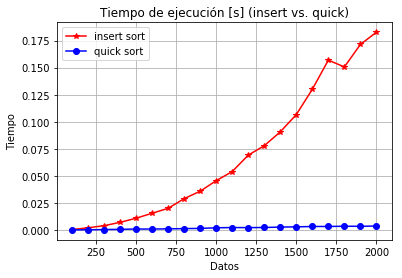

In [30]:
#Generando la gráfica
fig, ax = subplots()
ax.plot(datos, tiempo_is, label="insert sort", marker="*",color="r")
ax.plot(datos, tiempo_qs, label="quick sort", marker="o",color="b")
ax.set_xlabel('Datos') 
ax.set_ylabel('Tiempo') 
ax.grid(True)
ax.legend(loc=2); 

plt.title('Tiempo de ejecución [s] (insert vs. quick)')
plt.show()

## Modelo RAM

Cuando se realiza un análisis de complejidad utilzando el modelo RAM, se debe contabilizar las veces que se ejecuta una función o un ciclo, en lugar de medir el tiempo de ejecución.

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

times = 0

def insertionSort_graph(n_lista):
    global times
    for index in range(1,len(n_lista)):
        times += 1
        actual = n_lista[index]
        posicion = index
        while posicion>0 and n_lista[posicion-1]>actual:
            times += 1
            n_lista[posicion]=n_lista[posicion-1]
            posicion = posicion-1           
        n_lista[posicion]=actual
    return n_lista

In [32]:
TAM = 101
eje_x = list(range(1,TAM,1))
eje_y = []
lista_variable = []

for num in eje_x:
    lista_variable = random.sample(range(0, 1000), num)
    times = 0
    lista_variable = insertionSort_graph(lista_variable)
    eje_y.append(times)

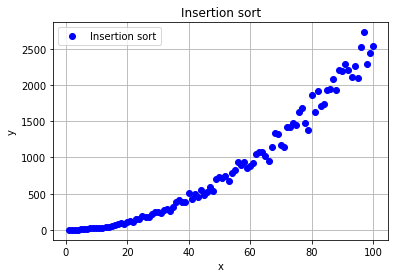

In [33]:
fig, ax = plt.subplots(facecolor='w', edgecolor='k')
ax.plot(eje_x, eje_y, marker="o",color="b", linestyle='None')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.legend(["Insertion sort"])

plt.title('Insertion sort')
plt.show()

----

# Bibliografía

[1] *Design and analysis of algorithms*; Prabhakar Gupta y Manish Varshney; PHI Learning, 2012, segunda edición.<br>
[2] *Introduction to Algorithms*, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest y Clifford Stein; The MIT Press; 2009, tercera edicion.<br>
[3] *Problem Solving with Algorithms and Data Structures using Python*; Bradley N. Miller y David L. Ranum, Franklin, Beedle & Associates; 2011, segunda edition.<br>
[4] https://docs.python.org/3/library/itertools.html#<br>
[5] https://docs.python.org/3/library/itertools.html#itertools.product<br>
[6] https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files<br>
[7] https://docs.python.org/3.5/library/pickle.html